# Geração de regras de associação - Algoritmo Apriori

### Prevendo dados com base em comportamentos!

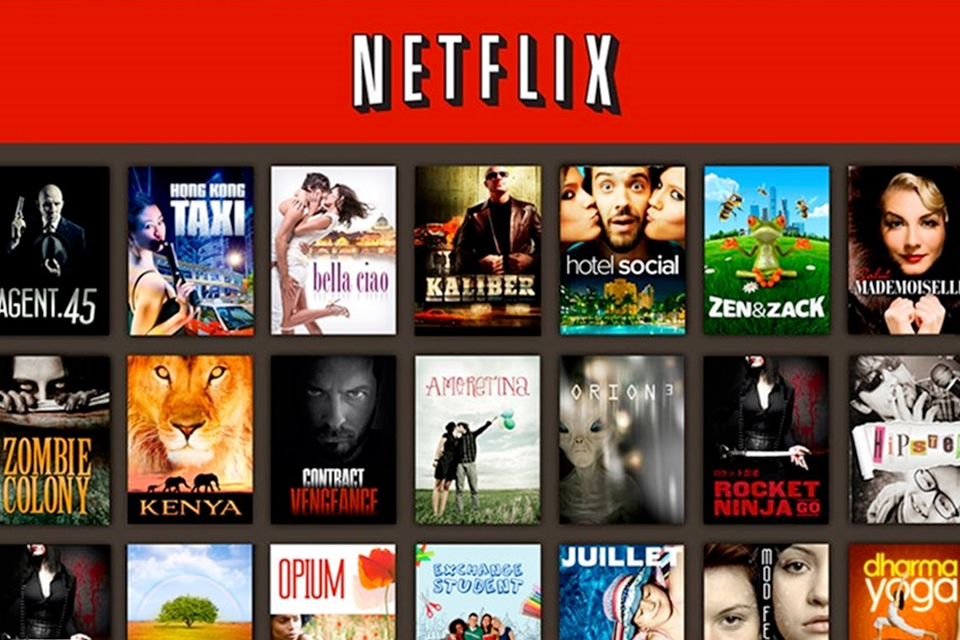

## Como podemos definir o que são regras de associação?

Regras de associação são um conjunto de métricas e regras criadas para identificar a relação entre dados. Esse tipo de técnica é muito utilizado em sistemas de recomendação, como por exemplo a Netflix, Spotify e também muito utilizado em cestas de compras em supermercados, lojas virtuais, etc.

Basicamente as regras de associações funcionam com algumas métricas de suporte a decisão. Essas métricas direcionam a identificação sobre qual a probabilidade de um produto "A" está relacionado com o produto "B" por exemplo.

### Algoritmo Apriori

O Algoritmo Apriori é uma das técnicas de associação mais utilizada para criar associação aos dados. Vamos implementar o algoritmo passo a passo em Python e entender seu funcionamento.

Basicamente, o algoritmo utiliza 3 métricas para associar dados, sendo elas:
* Suporte
* Confiança
* Lift

Vamos imaginar que temos dois tipos de produtos, A e B:

### Suporte: 

O suporte avalia o número total de transações que contém todos os dados. Com o suporte é possível identificar o **percentual** de cada item dentro de um conjunto de dados. Sendo assim, podemos observar que dentro de uma transação temos um percentual de A e um percentual de B.

### Confiança:

A confiança indica a **porporção** de vezes que em uma transação contém cada dado. Nesse caso, temos a porproção de vezes tanto para o produto A quanto para B dentro de uma **mesma** transação.

### Lift:

O lift traz o valor de frequência sobre um dado correlacionado a outro dado. Quanto aumenta a frequência de B em relação a A?

### Mas como eu posso equilibrar essas métricas? Devo utilizar todas? Vamos entender...

### Qual é a relação do Homem Aranha com o Batman?

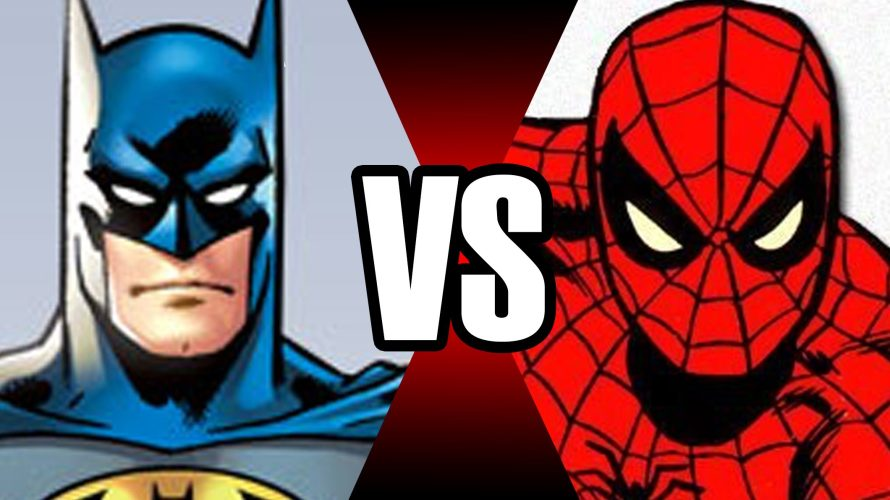

Para entender melhor esse algoritmo, vamos observar o exemplo abaixo:

**Base de dados:**

Vamos supor que a base de dados abaixo é referente a registro de pessoas que consomem filmes na Netflix. Na base de dados, cada linha representa um registro de uma pessoa que assistiu uma lista de filmes na plataforma. Temos dentro dessa base de exemplo filmes como "Homem Aranha", "Batman" e "Quarteto Fantástico".

Vamos considerar a seguinte regra: _Quem assiste filme do Homem Aranha também assiste filme do Batman._

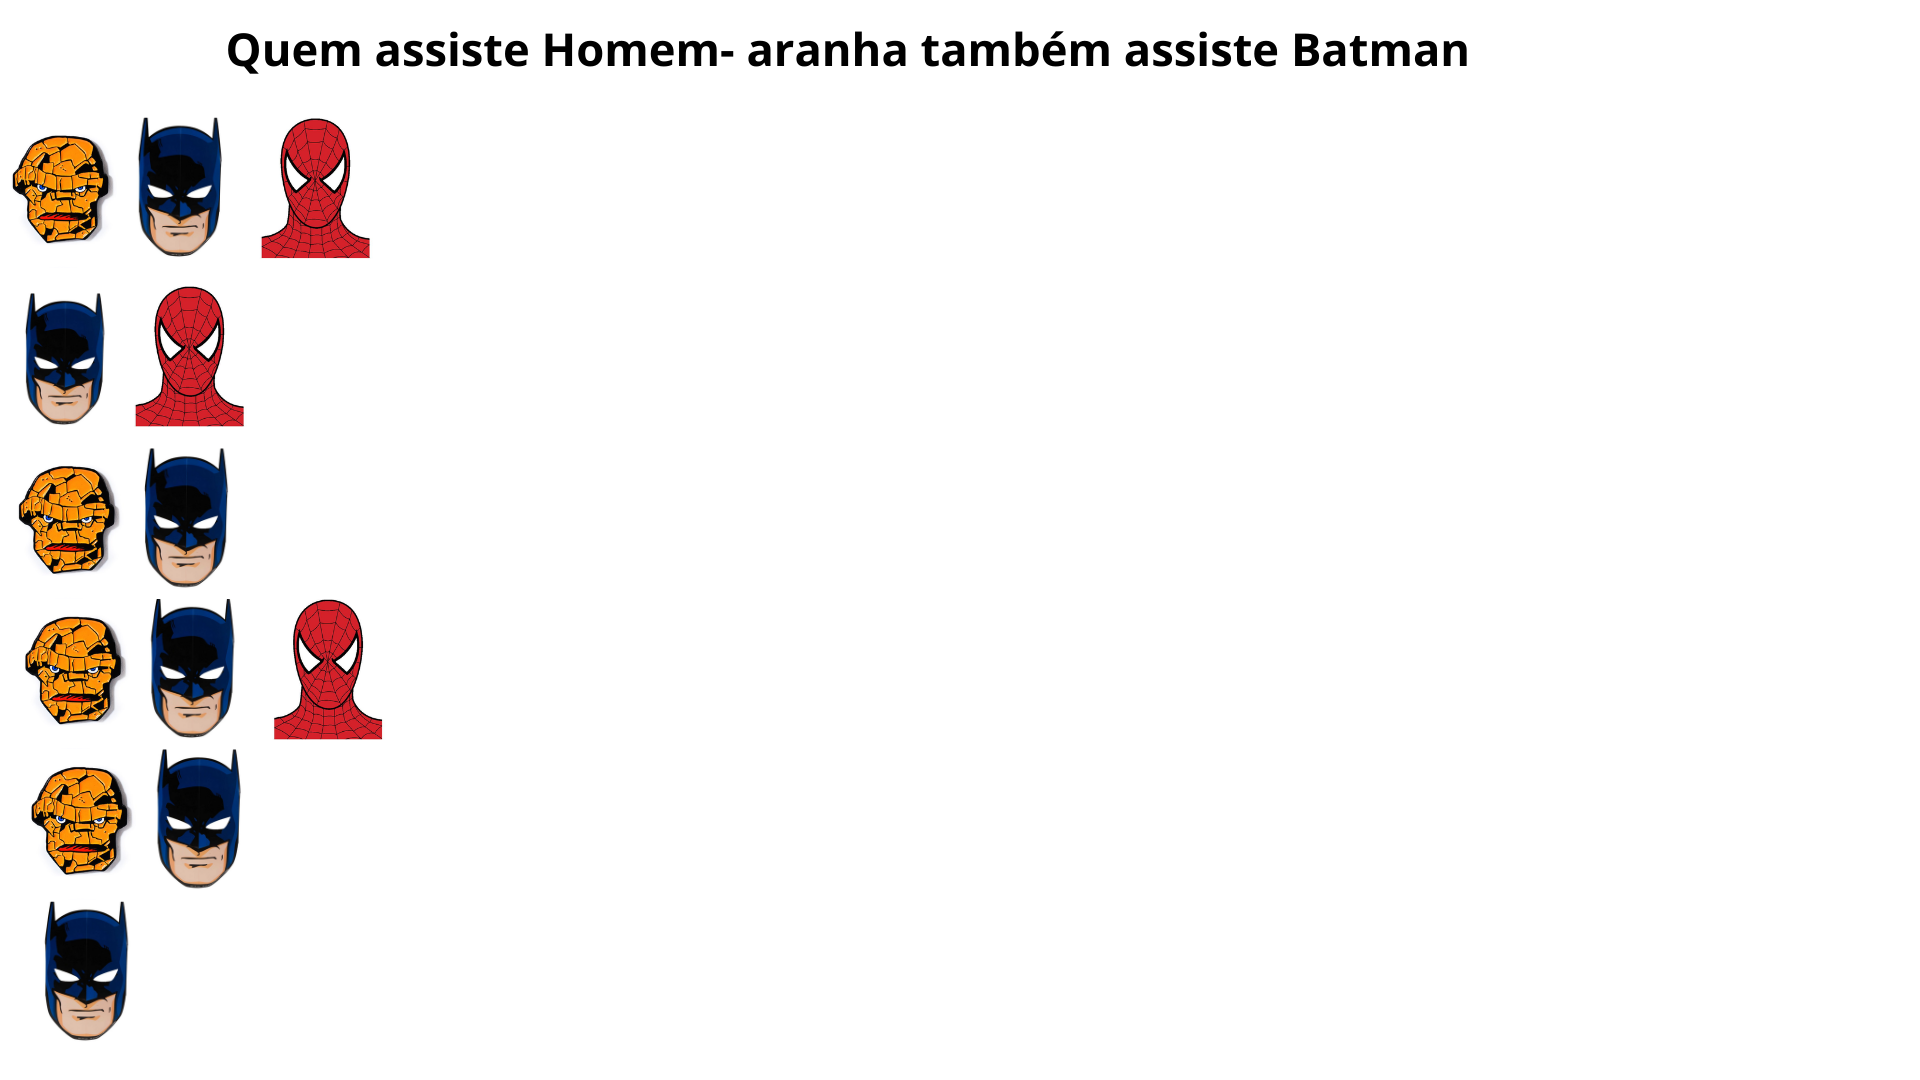

O algoritmo Apriori tenta extrair regras para cada combinação possível de itens. Nesse exemplo, vamos utilizar a combinação de dois dados (Homem Aranha + Batman), mas também poderiamos validar "N" situações...

**Definindo o suporte:** 

Ao definir nosso suporte, estamos selecionando dados que possuem uma certa correlação existente.

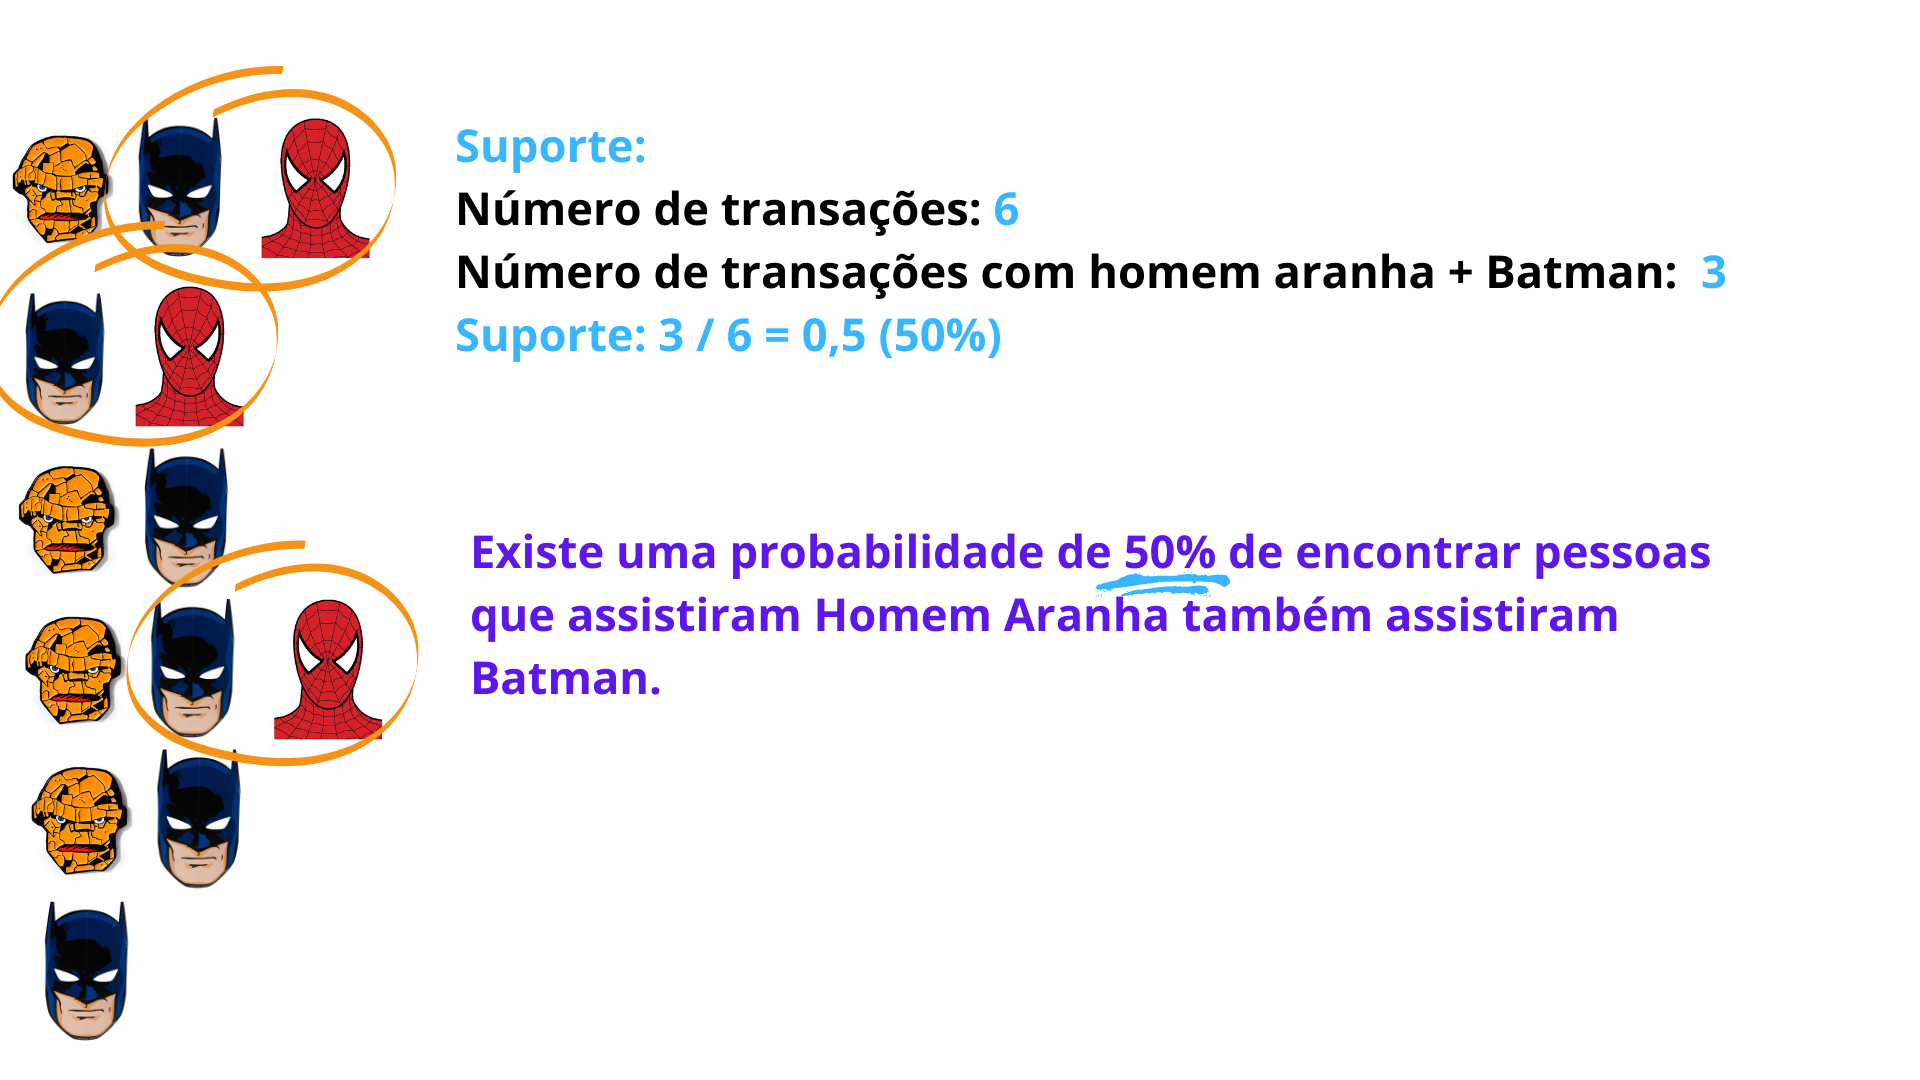

**Definindo a confiança:**

Ao definir a confiança, estamos selecionando um valor mínimo para correlação entre os itens.

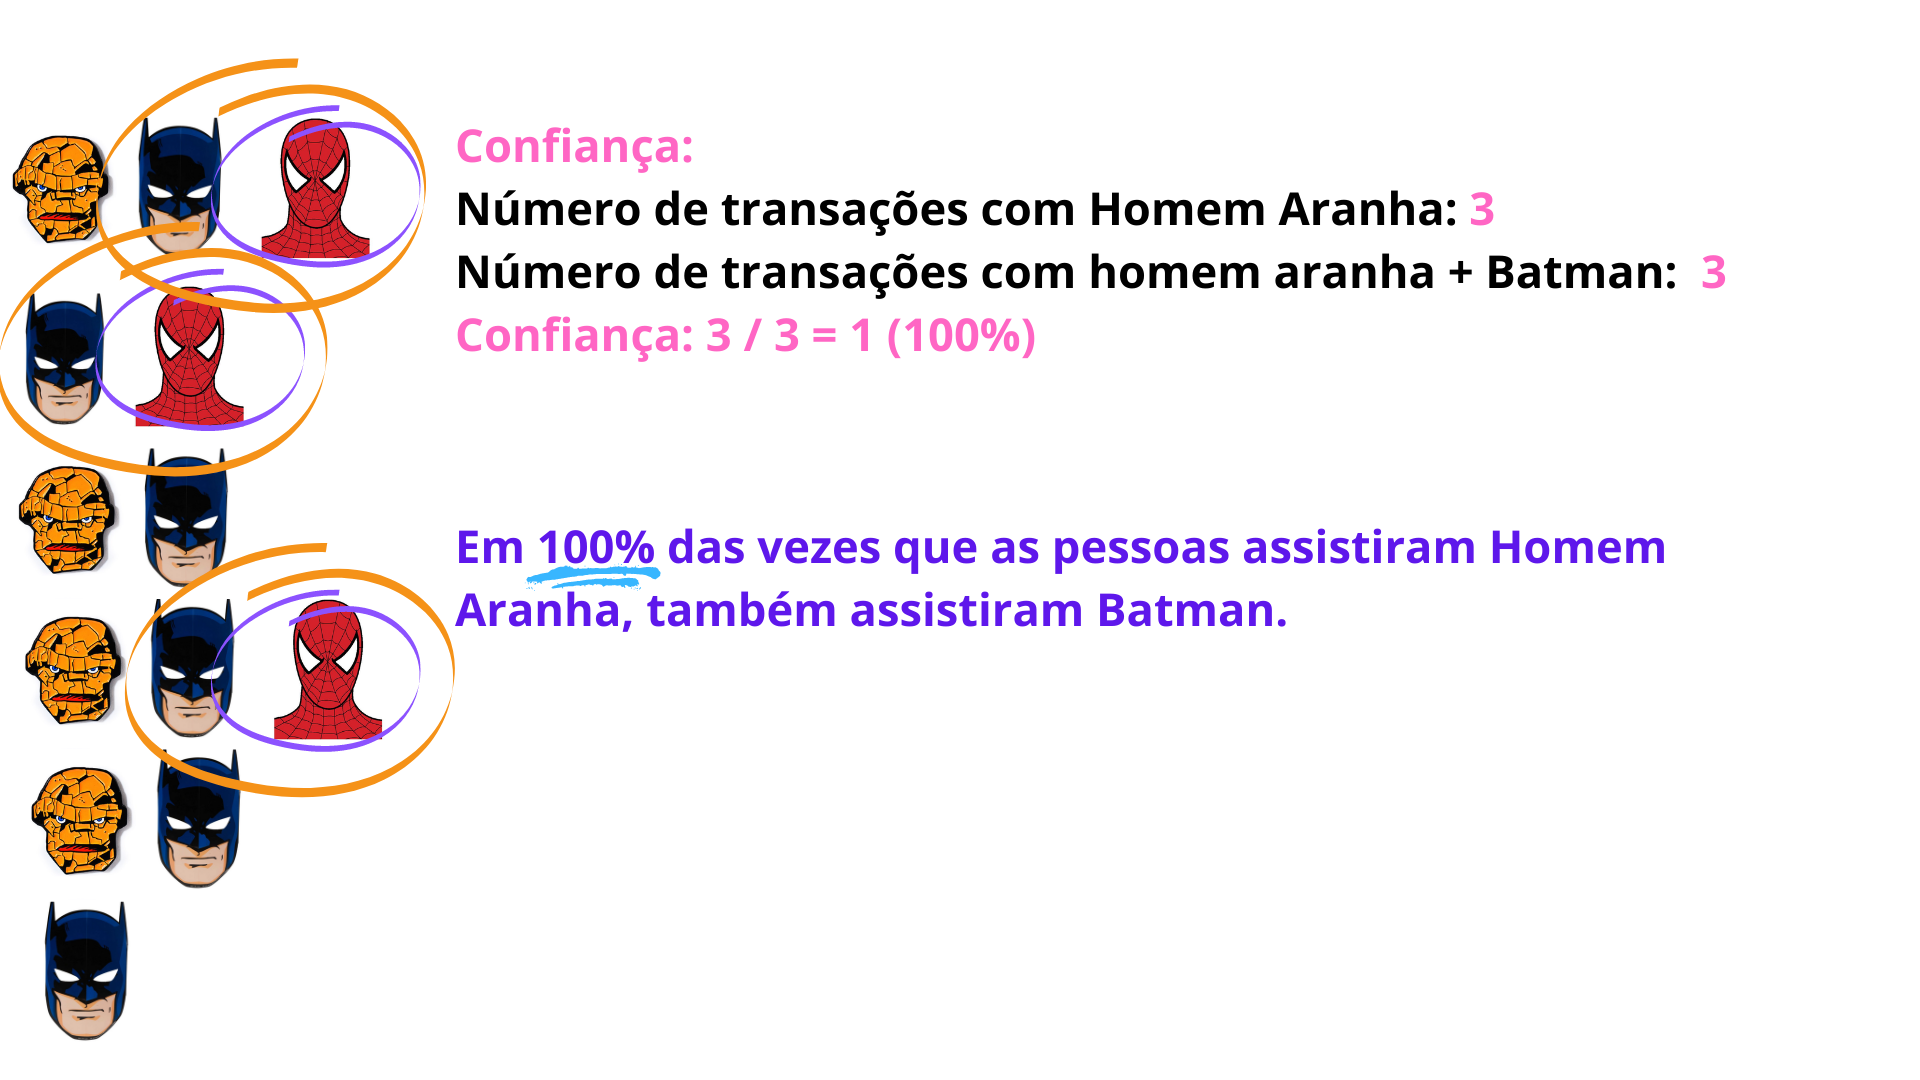

**Definindo o Lift:**

Com o Lift vamos definir a métrica de associação entre os dados buscados.

    


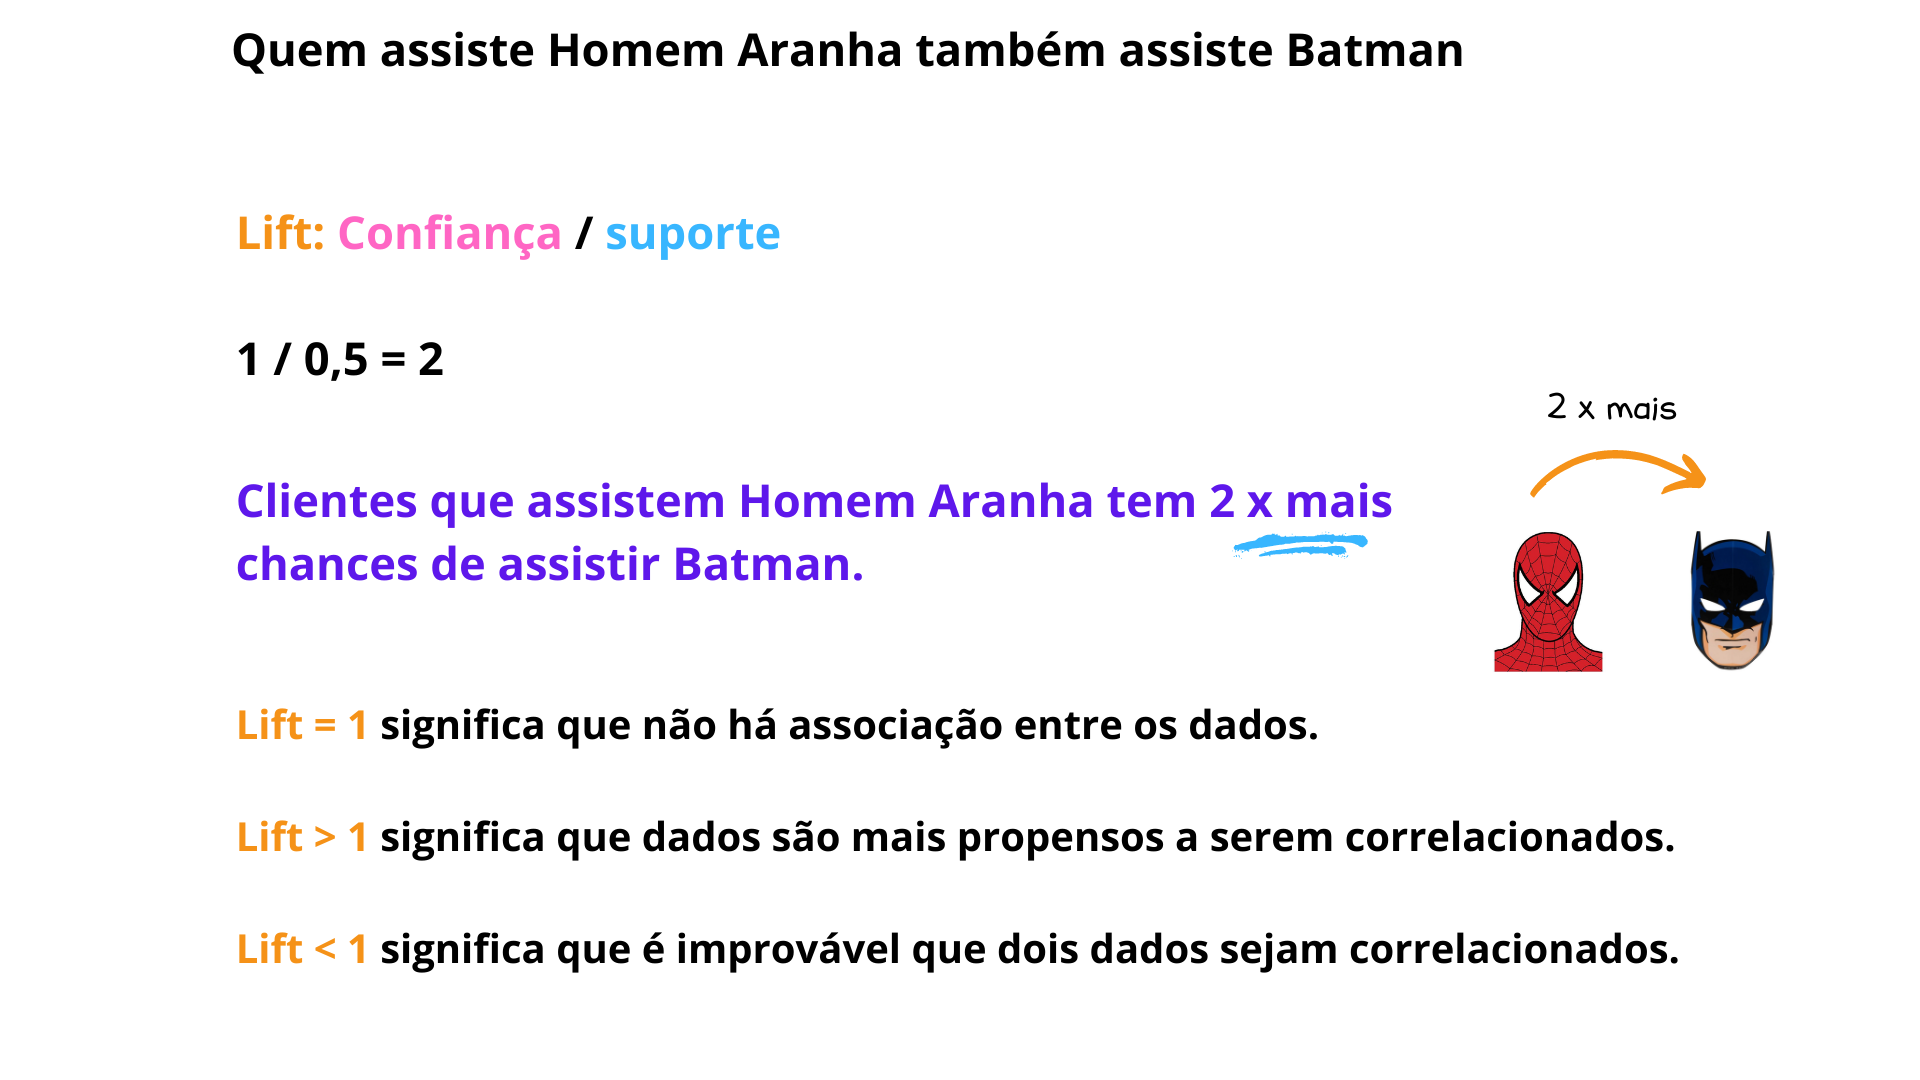

Realizando o cálculo com todas as possibilidades temos:

- Homem Aranha + Batman = (**Lift: 2**)
- Homem Aranha + Quarteto Fantastico = (Suporte = 6 / 2 = 0,3) + (Confiança = 3 / 2 = 1,5) + (**Lift: 0,3 / 1,5 = 0,2**)
- Batman + Homem Aranha = (Suporte = 6 / 3 = 0,5) + (Confiança = 6 / 3 = 2) + (**Lift: 0,5 / 2  = 0,3**)
- Batman + Quarteto Fantastico = (Suporte = 6 / 4 = 0,7) + (Confiança = 6 / 4 = 1,5) + (**Lift: 0,5 / 1,5  = 0,4**)
- Quarteto Fantastico + Homem Aranha = (Suporte = 6 / 2 = 0,3) + (Confiança = 4 / 2 = 2) + (**Lift: 0,3 / 2  = 0,2**)
- Quarteto Fantastico + Batman = (Suporte = 6 / 4 = 0,7) + (Confiança = 4 / 4 = 1) + (**Lift: 0,7 / 1  = 0,7**)


Analisando os resultados de Lift, qual é a combinação de dados que tem maior porbabilidade?

A combinação de quem assiste Homem Aranha também assiste Batman é de um Lift = 2, sendo assim essa foi a combinação que gerou maior probabilidade de acontecer. 
(Lift > 1)

### Implementando o algoritmo de Apriori

Para implementar o algortimo, vamos utilizar uma base de dados que está em um formato de dataframe. Esse dataframe contém linhas de registros de filmes assistidos por usuário.

#### Importando as bibliotecas necessárias:


In [54]:
#! pip install apyori
#! pip install efficient-apriori

In [123]:
import numpy as np  
import matplotlib.pyplot as plt  
import pandas as pd  
import missingno as msno 
from apyori import apriori

#### Importando a base de dados para trabalharmos com o algoritmo:

In [124]:
filmes_dataset = pd.read_csv('movie_dataset.csv', header = None)
total_registros = len(filmes_dataset)
print(total_registros)

7501


In [26]:
filmes_dataset.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,The Revenant,13 Hours,Allied,Zootopia,Jigsaw,Achorman,Grinch,Fast and Furious,Ghostbusters,Wolverine,Mad Max,John Wick,La La Land,The Good Dunosaur,Ninja Turtles,The Good Dunosaur Bad Moms,2 Guns,Inside Out,Valerian,Spiderman 3
1,Beirut,Martian,Get Out,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Deadpool,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,X-Men,Allied,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Ninja Turtles,Moana,Ghost in the Shell,Ralph Breaks the Internet,John Wick,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:>

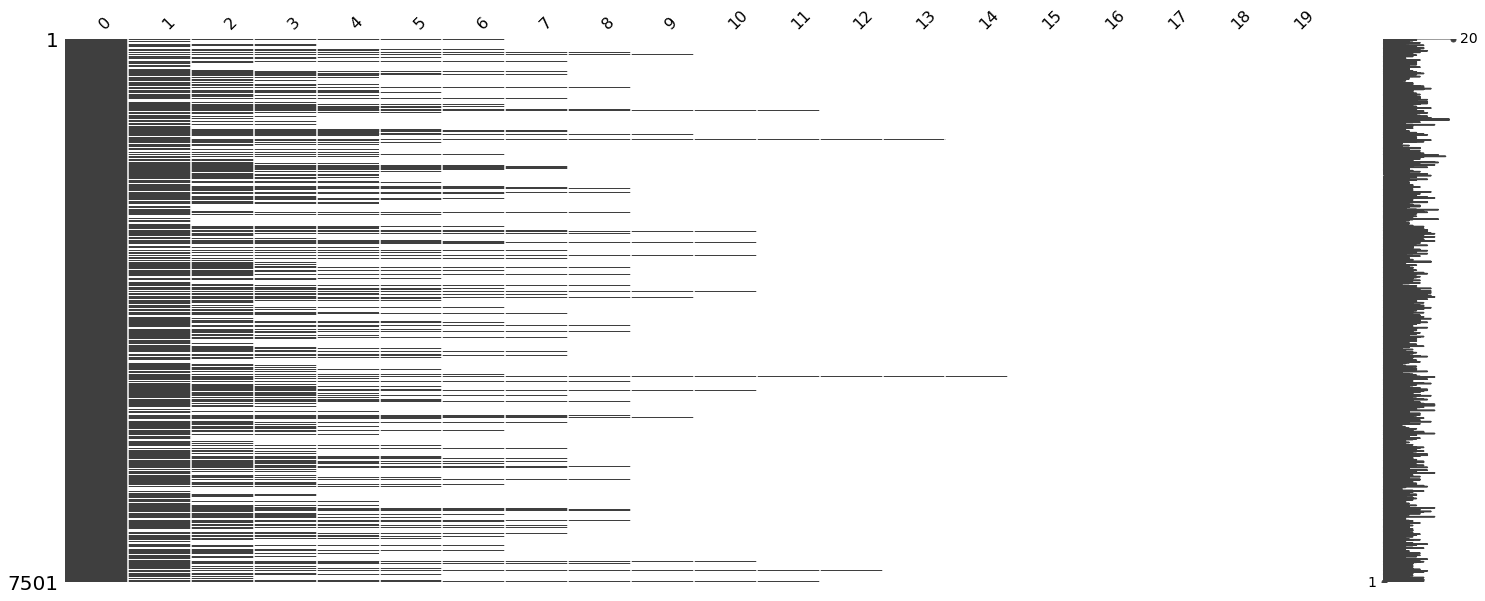

In [39]:
msno.matrix(filmes_dataset)

#### Processamento dos dados:

A biblioteca Apriori que vamos usar requer que nosso conjunto de dados esteja na forma de uma lista de listas. Vamos realizar a conversão do dataframe "filmes_dataset" em uma grande lista de listas:

In [125]:
registros = []  
for i in range(0, total_registros):  
    registros.append([str(filmes_dataset.values[i,j]) for j in range(0, 20)])

In [14]:
#registros # analisando o resultado da lista

#### Especificando os parâmetros do algoritmo apriori:

- min_support (tamamnho mínimo para suporte)
- min_confidence (Confiança mínima)
- min_lift (tamanho mínimo de lift)
- min_length (tamanho mínimo de regras)

#### Definindo as regras:
- Vamos supor que queremos apenas filmes que são assistidos pelo menos 50 vezes em um mês.
- Suporte = (50 / 7500) = 0.0067
- Confiança = 20%
- Valor de Lift = 3
- Tamanho de regras = 2 (valor mínimo)

In [126]:
#Definindo o suporte mínimo (pelo menos 50 filmes assistidos)

min_support = 50/len(registros) 
print(round(min_support, 4))

0.0067


### Aplicando o algoritmo:

In [127]:
regras_de_associacao = apriori(registros, min_support=0.0067, min_confidence=0.20, min_lift=3, min_length=2)
regras_de_associacao = list(regras_de_associacao)  #Convertendo regras encontradas em lista para visualizar os dados.

Número total de regras extraídas pela classe a priori:

In [115]:
print(len(regras_de_associacao))

10


Temos um total de 10 regras, vamos analisar quais são elas:

In [128]:
for regras in regras_de_associacao:
  print(regras_de_associacao)

[RelationRecord(items=frozenset({'Jumanji', 'Kung Fu Panda'}), support=0.015997866951073192, ordered_statistics=[OrderedStatistic(items_base=frozenset({'Kung Fu Panda'}), items_add=frozenset({'Jumanji'}), confidence=0.3234501347708895, lift=3.2919938411349285)]), RelationRecord(items=frozenset({'The Spy Who Dumped Me', 'Spiderman 3'}), support=0.007998933475536596, ordered_statistics=[OrderedStatistic(items_base=frozenset({'The Spy Who Dumped Me'}), items_add=frozenset({'Spiderman 3'}), confidence=0.2714932126696833, lift=4.122410097642296)]), RelationRecord(items=frozenset({'Intern', 'Jumanji', 'Tomb Rider'}), support=0.008665511265164644, ordered_statistics=[OrderedStatistic(items_base=frozenset({'Intern', 'Tomb Rider'}), items_add=frozenset({'Jumanji'}), confidence=0.31100478468899523, lift=3.165328208890303)]), RelationRecord(items=frozenset({'The Revenant', 'Intern', 'Ninja Turtles'}), support=0.007199040127982935, ordered_statistics=[OrderedStatistic(items_base=frozenset({'The Re

Vamos analisar o primeiro item trazido pela regra:

**{'Jumanji', 'Kung Fu Panda'}**

- Temos um suporte de 0.0159, ou seja foi calculado o número total de transações contendo o filme Jumanji e Kung Fu Panda dividido pelo total de transações da base (7500).

- O nível de confiança para a regra é de 0.32, ou seja 30% das vezes que alguém assistiu Jumanji, também assistiu Kung Fu Panda.

- O lift é de 3.29, ou seja, quem assistiu Jumanji tem 3 x mais chances de assistir Kung Fu Panda.



O código abaixo organiza os resultados em tabela para identificarnos melhor as regras criadas:

In [129]:
resultados = []
for item in regras_de_associacao:
    
    # first index of the inner list
    # Contains base item and add item
    pair = item[0] 
    items = [x for x in pair]
    
    value0 = str(items[0])
    value1 = str(items[1])

    #second index of the inner list
    value2 = str(item[1])[:7]

    #third index of the list located at 0th
    #of the third index of the inner list

    value3 = str(item[2][0][2])[:7]
    value4 = str(item[2][0][3])[:7]
    
    linhas = (value0, value1,value2,value3,value4)
    resultados.append(linhas)
    
headers = ['Title 1','Title 2','Support','Confidence','Lift']
sugestao_filmes = pd.DataFrame.from_records(resultados, columns = headers)

print(sugestao_filmes)

                 Title 1        Title 2  Support Confidence     Lift
0                Jumanji  Kung Fu Panda  0.01599    0.32345  3.29199
1  The Spy Who Dumped Me    Spiderman 3  0.00799    0.27149  4.12241
2                 Intern        Jumanji  0.00866    0.31100  3.16532
3           The Revenant         Intern  0.00719    0.30508  3.20061
4                    nan        Jumanji  0.01599    0.32345  3.29199
5                  Moana    Spiderman 3  0.00719    0.20300  3.08250
6  The Spy Who Dumped Me            nan  0.00799    0.27149  4.13077
7                 Intern        Jumanji  0.00866    0.31100  3.16532
8           The Revenant         Intern  0.00719    0.30508  3.20061
9                  Moana            nan  0.00719    0.20300  3.08876


Podemos concluir que o algoritmo de Apriori é muito útil para identificar correlações simples de dados. Importante resaltar que cada tipo de problema de negócio necessita de uma análise específica, para assim posteriormente ser implementado um algoritmo
para solucionar o problema.

